In [18]:
from pandas import read_csv, Timestamp
from numpy import nan
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import subplots, savefig, show
from ds_charts import get_variable_types, HEIGHT
from matplotlib.pyplot import figure, savefig, show, title
from seaborn import heatmap

In [19]:
register_matplotlib_converters()
filename = "new_data/set1_symbolic_to_numeric.csv"
data = read_csv(filename)

In [20]:
columns_not_to_correlate = ['VEHICLE_ID', 'PERSON_ID', 'UNIQUE_ID', 'COLLISION_ID',]
data.drop(columns=columns_not_to_correlate, inplace=True)

In [21]:
corr_mtx = data.corr()
print(corr_mtx)

                  CRASH_TIME  PERSON_AGE  SAFETY_EQUIPMENT  COMPLAINT  \
CRASH_TIME          1.000000   -0.005055         -0.062487  -0.009776   
PERSON_AGE         -0.005055    1.000000          0.025870  -0.000941   
SAFETY_EQUIPMENT   -0.062487    0.025870          1.000000  -0.203894   
COMPLAINT          -0.009776   -0.000941         -0.203894   1.000000   
EMOTIONAL_STATUS    0.028578   -0.004179          0.097459  -0.334069   
PERSON_INJURY      -0.024017    0.008022         -0.066262   0.244767   
CRASH_MONTH        -0.013928   -0.000201         -0.046101   0.002071   
CRASH_DAY          -0.007675   -0.001566         -0.015315  -0.002311   

                  EMOTIONAL_STATUS  PERSON_INJURY  CRASH_MONTH  CRASH_DAY  
CRASH_TIME                0.028578      -0.024017    -0.013928  -0.007675  
PERSON_AGE               -0.004179       0.008022    -0.000201  -0.001566  
SAFETY_EQUIPMENT          0.097459      -0.066262    -0.046101  -0.015315  
COMPLAINT                -0.334069    

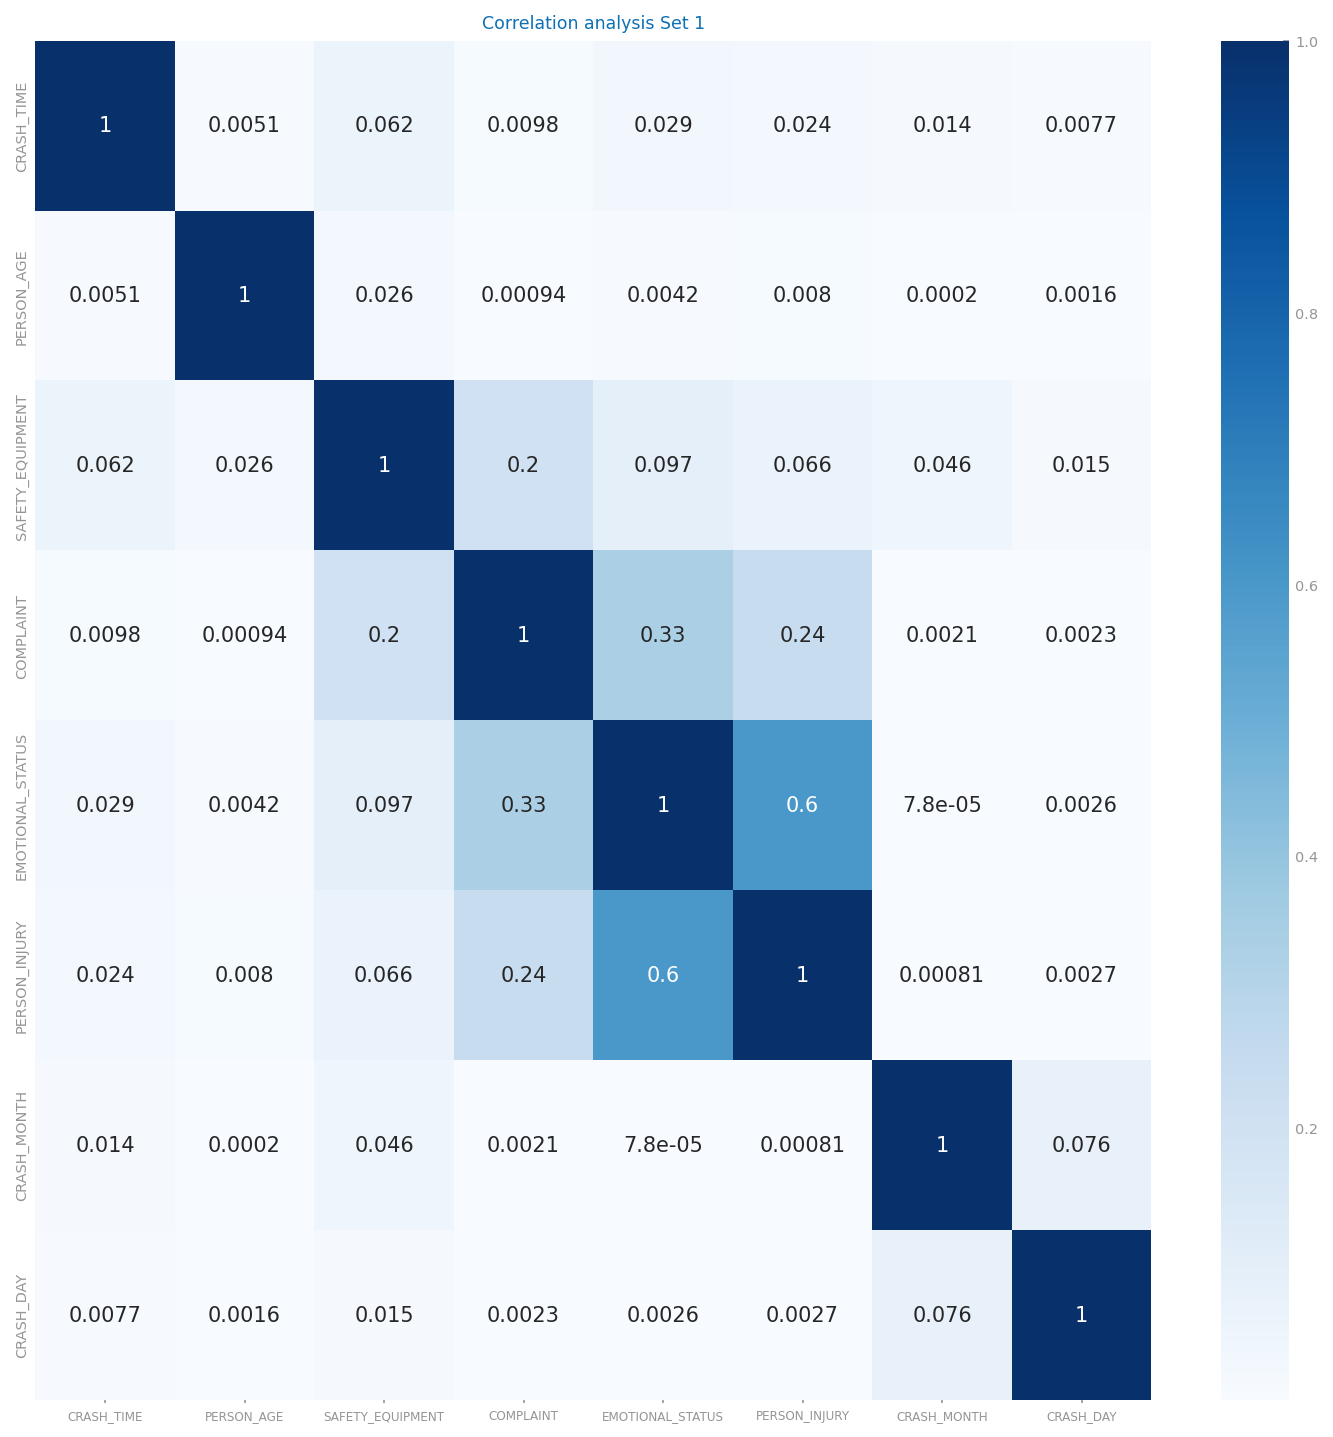

In [22]:
fig = figure(figsize=[12, 12])
fig.patch.set_facecolor('white')
heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
title('Correlation analysis Set 1')
savefig(f'images/set1/correlation_analysis_set1.png')
show()